# Practice Linear Regression

In [2]:
# Install 

# Linux / Binder
# !pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

In [3]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [4]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [5]:
# Check the size of dataset
len(dataset)

60000

In [6]:
# Additional set pf 10 000 images used for evaluating models.
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [7]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FD1E02718E0>, 5)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 0


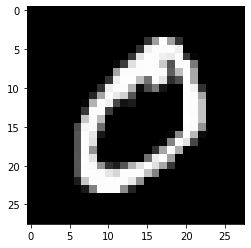

In [9]:
image, label = dataset[1]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 5


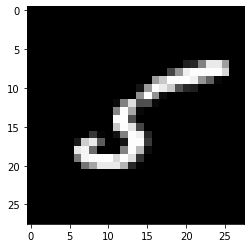

In [10]:
image, label = dataset[11]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [11]:
import torchvision.transforms as transforms

In [12]:
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [13]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [14]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch)

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) <module 'torch' from '/home/ma/.local/lib/python3.8/site-packages/torch/__init__.py'>


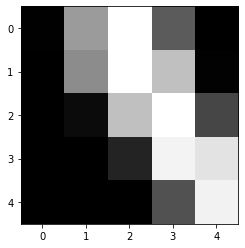

In [15]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

## Training and Validation Datasets


1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
3. **Test set** - used to compare different models or approaches and report the model's final accuracy.


In [16]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [17]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Model

In [18]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model=nn.Linear(input_size, num_classes)

In [19]:
print(model.weight.shape)

torch.Size([10, 784])


In [20]:
model.weight

Parameter containing:
tensor([[-0.0123, -0.0334, -0.0293,  ...,  0.0232, -0.0017,  0.0010],
        [-0.0034, -0.0084, -0.0276,  ..., -0.0230, -0.0164,  0.0236],
        [ 0.0298, -0.0050, -0.0247,  ..., -0.0320,  0.0240,  0.0281],
        ...,
        [-0.0109, -0.0012,  0.0104,  ..., -0.0187, -0.0016, -0.0143],
        [ 0.0060,  0.0059,  0.0074,  ..., -0.0322, -0.0223,  0.0100],
        [-0.0285, -0.0145, -0.0089,  ..., -0.0155, -0.0143,  0.0024]],
       requires_grad=True)

In [21]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0299,  0.0247,  0.0277,  0.0252,  0.0060,  0.0356,  0.0007,  0.0281,
        -0.0354,  0.0230], requires_grad=True)

In [27]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    # outputs = model(images)
    # print(outputs)
    break

tensor([8, 5, 2, 1, 7, 2, 2, 9, 1, 3, 7, 6, 6, 1, 3, 4, 7, 6, 1, 2, 6, 4, 4, 5,
        5, 9, 0, 1, 8, 3, 3, 6, 1, 2, 9, 4, 9, 8, 7, 1, 9, 3, 9, 1, 3, 6, 8, 2,
        5, 5, 3, 9, 2, 4, 1, 3, 9, 1, 4, 8, 2, 3, 5, 4, 8, 4, 4, 2, 4, 3, 0, 7,
        2, 8, 2, 7, 5, 7, 8, 9, 6, 3, 8, 9, 5, 4, 0, 7, 6, 8, 3, 7, 9, 9, 9, 3,
        1, 4, 0, 2, 0, 8, 2, 9, 5, 8, 0, 6, 1, 1, 4, 1, 3, 7, 6, 0, 9, 4, 8, 6,
        5, 9, 2, 9, 2, 9, 0, 1])
torch.Size([128, 1, 28, 28])


In [24]:
images.shape

torch.Size([128, 1, 28, 28])

In [25]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [30]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [32]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [38]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0339,  0.0172, -0.0058,  ...,  0.0346,  0.0255,  0.0019],
         [ 0.0301,  0.0264,  0.0285,  ...,  0.0055,  0.0113, -0.0210],
         [-0.0341, -0.0186,  0.0123,  ..., -0.0099, -0.0024,  0.0005],
         ...,
         [-0.0214, -0.0087, -0.0295,  ...,  0.0084, -0.0278,  0.0246],
         [-0.0145, -0.0295, -0.0037,  ...,  0.0003,  0.0207,  0.0202],
         [ 0.0070, -0.0082, -0.0300,  ...,  0.0031,  0.0073, -0.0135]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0171, -0.0064,  0.0155, -0.0328, -0.0312,  0.0348,  0.0072,  0.0280,
         -0.0164,  0.0179], requires_grad=True)]

In [43]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape: ', outputs.shape)
print('Sample outputs: \n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape:  torch.Size([128, 10])
Sample outputs: 
 tensor([[-0.2886,  0.1751,  0.1315, -0.1294, -0.3179, -0.1214,  0.3150, -0.4394,
          0.1163, -0.3917],
        [-0.5010,  0.0450,  0.0664, -0.2660, -0.1065, -0.0523,  0.1139, -0.2586,
          0.2473, -0.2043]])


In [46]:
import torch.nn.functional as F

In [48]:
outputs[:2]

tensor([[-0.2886,  0.1751,  0.1315, -0.1294, -0.3179, -0.1214,  0.3150, -0.4394,
          0.1163, -0.3917],
        [-0.5010,  0.0450,  0.0664, -0.2660, -0.1065, -0.0523,  0.1139, -0.2586,
          0.2473, -0.2043]], grad_fn=<SliceBackward>)

In [51]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0798, 0.1269, 0.1215, 0.0936, 0.0775, 0.0944, 0.1460, 0.0687, 0.1197,
         0.0720],
        [0.0650, 0.1122, 0.1146, 0.0822, 0.0964, 0.1018, 0.1202, 0.0828, 0.1373,
         0.0874]])
Sum:  1.0000001192092896


In [59]:
max_probs, preds = torch.max(probs, dim=1)
print(max_probs)
print(preds)

tensor([0.1460, 0.1373, 0.1377, 0.1441, 0.1405, 0.1435, 0.1396, 0.1352, 0.1857,
        0.1220, 0.1349, 0.1552, 0.1609, 0.1664, 0.1503, 0.1488, 0.1422, 0.1169,
        0.1299, 0.1581, 0.1236, 0.1300, 0.1240, 0.1346, 0.1548, 0.1368, 0.1390,
        0.1293, 0.1410, 0.1272, 0.1206, 0.1444, 0.1632, 0.1589, 0.1242, 0.1347,
        0.1374, 0.1656, 0.1439, 0.1717, 0.1396, 0.1469, 0.1745, 0.1697, 0.1335,
        0.1502, 0.1450, 0.1283, 0.1400, 0.1822, 0.2180, 0.1731, 0.1463, 0.1307,
        0.1757, 0.1442, 0.1766, 0.1483, 0.1675, 0.1479, 0.1619, 0.1291, 0.1392,
        0.1382, 0.1316, 0.1478, 0.1475, 0.1542, 0.1457, 0.1654, 0.1797, 0.1333,
        0.1321, 0.1660, 0.1672, 0.1531, 0.1127, 0.1284, 0.1617, 0.1558, 0.1471,
        0.1318, 0.1300, 0.1372, 0.1312, 0.1956, 0.1773, 0.1331, 0.1680, 0.1592,
        0.1770, 0.1328, 0.1497, 0.1580, 0.1506, 0.1858, 0.1432, 0.1660, 0.1509,
        0.1316, 0.1496, 0.1242, 0.1662, 0.1296, 0.1320, 0.1729, 0.1381, 0.1382,
        0.1271, 0.1183, 0.1662, 0.1468, 

In [62]:
len(labels), labels

(128,
 tensor([9, 7, 3, 2, 9, 8, 8, 1, 6, 3, 7, 3, 4, 4, 4, 0, 7, 7, 9, 3, 9, 7, 4, 2,
         6, 6, 6, 0, 0, 5, 7, 4, 8, 6, 5, 8, 4, 0, 0, 6, 5, 2, 8, 1, 2, 5, 0, 5,
         2, 1, 6, 2, 0, 3, 6, 5, 1, 4, 4, 6, 6, 3, 0, 9, 2, 6, 7, 9, 6, 9, 9, 3,
         2, 4, 9, 1, 2, 1, 6, 4, 1, 1, 5, 0, 0, 6, 6, 1, 2, 1, 6, 5, 6, 9, 5, 6,
         0, 6, 1, 5, 1, 0, 9, 0, 5, 3, 2, 8, 9, 7, 2, 4, 8, 7, 7, 1, 9, 8, 6, 2,
         1, 7, 1, 8, 5, 9, 9, 8]))

## Evaluation Metric and Loss Function

In [64]:
torch.sum(preds == labels)

tensor(22)

In [66]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [67]:
accuracy(outputs, labels)

tensor(0.1719)

In [69]:
loss_fn = F.cross_entropy

In [71]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2730, grad_fn=<NllLossBackward>)


## Training the model

```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```


In [79]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [82]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [83]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [84]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3244988918304443, 'val_acc': 0.0637855976819992}

In [85]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9556, val_acc: 0.6244
Epoch [1], val_loss: 1.6857, val_acc: 0.7342
Epoch [2], val_loss: 1.4844, val_acc: 0.7669
Epoch [3], val_loss: 1.3325, val_acc: 0.7864
Epoch [4], val_loss: 1.2157, val_acc: 0.7978


In [86]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1240, val_acc: 0.8072
Epoch [1], val_loss: 1.0505, val_acc: 0.8145
Epoch [2], val_loss: 0.9904, val_acc: 0.8213
Epoch [3], val_loss: 0.9404, val_acc: 0.8262
Epoch [4], val_loss: 0.8982, val_acc: 0.8299


In [87]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8620, val_acc: 0.8342
Epoch [1], val_loss: 0.8307, val_acc: 0.8372
Epoch [2], val_loss: 0.8033, val_acc: 0.8413
Epoch [3], val_loss: 0.7791, val_acc: 0.8438
Epoch [4], val_loss: 0.7576, val_acc: 0.8465


In [88]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7383, val_acc: 0.8475
Epoch [1], val_loss: 0.7208, val_acc: 0.8491
Epoch [2], val_loss: 0.7050, val_acc: 0.8503
Epoch [3], val_loss: 0.6906, val_acc: 0.8517
Epoch [4], val_loss: 0.6774, val_acc: 0.8530


In [89]:
history5 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6652, val_acc: 0.8548
Epoch [1], val_loss: 0.6540, val_acc: 0.8560
Epoch [2], val_loss: 0.6436, val_acc: 0.8567
Epoch [3], val_loss: 0.6339, val_acc: 0.8581
Epoch [4], val_loss: 0.6249, val_acc: 0.8593


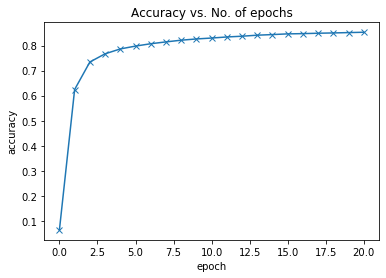

In [95]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [96]:
import jovian


In [97]:
jovian.log_metrics(val_acc=history[-1]['val_acc'], val_loss=history[-1]['val_loss'])

[jovian] Metrics logged.


In [98]:

jovian.commit(filename='practice-logistic-regression.ipynb')

<IPython.core.display.Javascript object>

[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/aleksmn/practice-logistic-regression


'https://jovian.ai/aleksmn/practice-logistic-regression'